In [1]:
# Import de librerias
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Lectura de archivos
df_monthly = pd.read_csv('./data/housing_in_london_monthly_variables_cleaned.csv')
df_yearly = pd.read_csv('./data/housing_in_london_yearly_variables_cleaned.csv')

In [3]:
#Funciones
def eliminar_registro_binario(dataframe, column_name, number):
    """Elimina filas de un DataFrame basado en un número especificado"""
    try:
        dataframe = dataframe.loc[dataframe[column_name] != number]
        return dataframe
    except KeyError:
        print(f'Error: no se encontró la columna "{column_name}".')


def remove_dates_before(df, date_col_name, min_date):
    df[date_col_name] = pd.to_datetime(df[date_col_name])  # convierte a tipo datetime
    mask = df[date_col_name] >= min_date  # crea una máscara booleana
    df_filtered = df[mask]  # aplica la máscara al DataFrame
    return df_filtered


-------------

# dfMonthly

Primero observamos el dataframe. Revisando las variables de nuestra unidad de observacion. En este caso, nuestra unidad de observacion es: 'Un area de la ciudad a traves del tiempo'

In [4]:
df_monthly.head(5)
f'El tamaño del Frame es de: {df_monthly.shape}.'

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,2012-01-01,city of london,525723,E09000001,11.0,NaN,1
1,2012-02-01,city of london,510537,E09000001,17.0,NaN,1
2,2012-03-01,city of london,527408,E09000001,9.0,NaN,1
3,2012-04-01,city of london,524290,E09000001,12.0,NaN,1
4,2012-05-01,city of london,573532,E09000001,12.0,NaN,1


'El tamaño del Frame es de: (4320, 7).'

In [5]:
f'Y las variables son de tipo: '
pd.DataFrame(df_monthly.dtypes.head(len(df_monthly)))

'Y las variables son de tipo: '

,0
date,object
area,object
average_price,int64
code,object
houses_sold,float64
no_of_crimes,float64
borough_flag,int64


In [6]:
df_monthly["date"] = pd.to_datetime(df_monthly.date)
df_monthly["area"] = df_monthly.area.astype("category")
df_monthly["code"] = df_monthly.code.astype("category")

In [7]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4320 non-null   datetime64[ns]
 1   area           4320 non-null   category      
 2   average_price  4320 non-null   int64         
 3   code           4320 non-null   category      
 4   houses_sold    4275 non-null   float64       
 5   no_of_crimes   3072 non-null   float64       
 6   borough_flag   4320 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2)
memory usage: 180.1 KB


## Llenar los valores nulos con ceros

In [8]:
def fill_with_zeros(df, col):
    df[col] = df[col].fillna(0)

#fill_with_zeros(df_monthly, 'houses_sold')
fill_with_zeros(df_monthly, 'no_of_crimes')

In [9]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4320 non-null   datetime64[ns]
 1   area           4320 non-null   category      
 2   average_price  4320 non-null   int64         
 3   code           4320 non-null   category      
 4   houses_sold    4275 non-null   float64       
 5   no_of_crimes   4320 non-null   float64       
 6   borough_flag   4320 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2)
memory usage: 180.1 KB


In [10]:
# Columnas por tipo de datos
nominal = ["area", "code", "borough_flag"]
ordinal = []
intervalo = ["date"]
razon = ["average_price", "houses_sold", "no_of_crimes"]

print(f'Variables nominales: {nominal}\n'
      f'Variables de intervalo: {intervalo}\n'
      f'Variables de razón: {razon}\n')

Variables nominales: ['area', 'code', 'borough_flag']
Variables de intervalo: ['date']
Variables de razón: ['average_price', 'houses_sold', 'no_of_crimes']



AGREGAR EN UNA LISTA POR CADA TIPO DE DATO PARA DESPUES AGREGAR CADA COLUMNA EN SU RESPECTIVA LISTA

#### Vamos una por una


### Borough Flag

Revisando los metadatos... Nos damos cuenta que 'Borough Flag' determina si el area observada es un distrito de London o no. Es decir,<br>

<br>
0 == Esto _No_ es un distrito de London<br>
1 == Esto _Si_ es un distrito de London

Los 0 conforman otra area geografica y sirven para hacer la comparacion demografica entre poblados y zonas, con la capital.

A nosotros en particular, lo unico que nos interesa y nos dara el analisis que buscamos es, si estudiamos UNICAMENTE los distritos pertenecientes a London. Pues nuestro estudio unicamente se enfoca en esa area geografica y su demografia.

Por lo tanto, todos los datos que tenga 0 en su 'borough_flag'; 
los quitaremos.

AHORA LA UNIDAD DE OBSERVACION ES SOLO LONDRES, HAY QUE ESPECIFICAR ESTO


### Code

Code parece ser el identificador del area observada. Leyendo los metadatos, efectivamente asi es. Al ser un objeto de tipo object y no servirnos para nada pues el nombre del area es sufieciente para identificar el area en si.  Lo vamos a borrar.

ELIMINAR TEXTO, HAY QUE IR AL GRANO.. USAR LENGUAJE MAS CIENTIFICO  
TANTO COMO CODIGO COMO NOMBRE TIENEN UNA RELACION 1:1, ESA PODRIA SER LA RAZON DE ELIMINAR ESTA COLUMNA, PERO...  
NO HAY QUE BORRAR CODIGO, NOS VA A SERVIR... ES COMO TENER UN CODIGO DE EMPLEADO Y SU NOMBRE, NUNCA SABES EN QUE REPORTE PUEDE SER DE AYUDA ESTA INFORMACION.

In [11]:
#dfMonthly=dfMonthly.drop('code',axis=1)
dfMonthly

NameError: name 'dfMonthly' is not defined

### Date

Date podemos ver que es tipo object, como en un futuro es importante que este en orden por fecha. Es importante que cambien ese string a un datetime.date

In [ ]:
#dfMonthly['date'] = pd.to_datetime(dfMonthly['date']).dt.date
dfMonthly

## {{Deberiamos quitar los datos anteriores de 2000?}}

Por ahora ya quedo.

### Los otros

Hay algunas variables que mencionaremos todas juntas en este apartado pues se pueden explicar brevemente:

* average_price: Como su nombre lo indica mide el precio promedio de una casa en ese distrito. En el tiempo registrado.
* houses_sold: Marca el total de casas que se vendio en el distrito en ese momento.(mes)
* no_of_crimes: El total de crimenes que hubo ese mes.

In [ ]:
pd.DataFrame(df_monthly.dtypes.head(len(df_monthly)))


,0
date,datetime64[ns]
area,category
average_price,int64
code,category
houses_sold,float64
no_of_crimes,float64
borough_flag,int64


#### Eureka!!! Ya lo tenemos
Ahora lo guardamos.

In [ ]:
#dfMonthly.to_csv('cleaned_monthly.csv', index=False)

# Adicional.

La maestra nos habia dicho que podiamos juntar todos los datos por año, vamos a intentarlo. Por si lo necesitamos.

Vamos a juntar todas las fechas, sacaremos el promedio del precio las casas y agregaremos a la variable de houses_sold y no_of_crimes todo el acumulado de los meses. 

In [ ]:
# Convertir la columna de fecha a formato de fecha
#dfMonthly['date'] = pd.to_datetime(dfMonthly['date'])

# Agrupar los datos por año y por área
df_yearly = dfMonthly.groupby([dfMonthly['date'].dt.year, 'area']).mean()

# Mostrar los resultados
print(df_yearly)


In [ ]:
#Definir las funciones de agregación
aggregations = {'average_price': 'mean', 'houses_sold': 'sum', 'no_of_crimes': 'sum'}

# Agrupar los datos por año y por área y aplicar las funciones de agregación
df_yearly = df_yearly.groupby([df_yearly.index.year, 'area']).agg(aggregations)
# Mostrar los resultados
print(df_yearly)



In [ ]:
dfMonthly

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Convertir la columna 'date' a tipo datetime
#dfMonthly['date'] = pd.to_datetime(dfMonthly['date'], format='%Y-%m-%d')

# Crear una columna 'year' con el año de cada fecha
#dfMonthly['year'] = dfMonthly['date'].dt.year

# Agrupar los datos por 'year' y 'area'
grouped = dfMonthly.groupby(['year', 'area'])

# Calcular el promedio de 'average_price', la suma de 'houses_sold', y la suma de 'no_of_crimes'
result = grouped.agg({'average_price': 'mean', 'houses_sold': 'sum', 'no_of_crimes': 'sum'})

# Restablecer el índice
dfYearly = result.reset_index()
dfYearly

In [ ]:
dfYearly.iloc[0]

Listo, solo fallo una cosita, para que los nulos al hacer el agregado nos lo cambio a 0, vamos a volver a hacerlo nulo.

In [ ]:
dfYearly['houses_sold'] = dfYearly['houses_sold'].replace(0, np.nan)
dfYearly['no_of_crimes'] = dfYearly['no_of_crimes'].replace(0, np.nan)
dfYearly

# Listo! Ya quedo.

# Est. Descriptiva

Medidas de Tendencia Central:
- moda
- media
- mediana


medidas de dispersion:
- rango
- desv. estandard
- varianza
- IQR (Intercuatiles)


- nom: moda
- ord: moda
- inter: mediana, media
- razon: mediana, media



In [ ]:
df_monthly.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,4.320000e+03,4320.000000,4320.000000,4320.000000
mean,4.132155e+05,3384.473843,1451.323148,0.733333
std,2.192579e+05,10463.384803,1150.103480,0.442268
min,1.120080e+05,0.000000,0.000000,0.000000
25%,2.655842e+05,206.000000,0.000000,0.000000
50%,3.779090e+05,287.000000,1665.000000,1.000000
75%,4.949445e+05,2830.250000,2242.250000,1.000000
max,1.463378e+06,119302.000000,7461.000000,1.000000


In [18]:
def show_boxplot(df, col):
    sns.boxplot(x=df[col])
    plt.show()

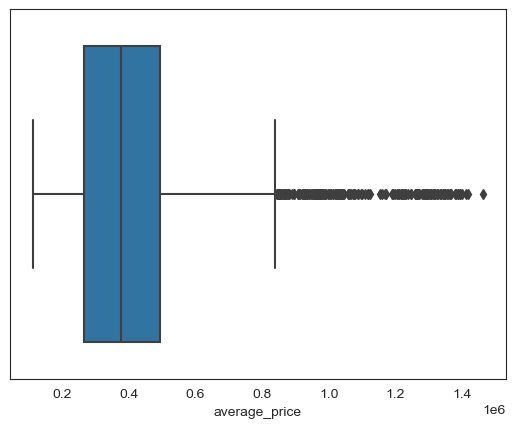

In [ ]:
show_boxplot(df_monthly, 'average_price')

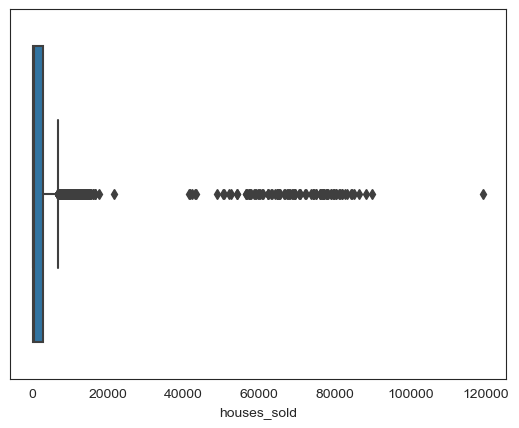

In [ ]:
show_boxplot(df_monthly, 'houses_sold')

In [ ]:
plt.show()

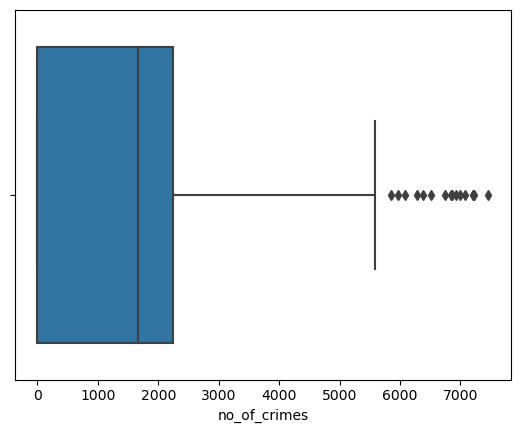

In [19]:
show_boxplot(df_monthly, 'no_of_crimes')

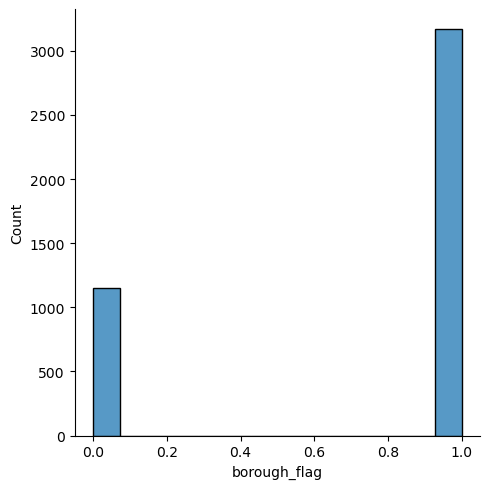

In [31]:
sns.displot(df_monthly['borough_flag'])

In [34]:
df_monthly['borough_flag'].value_counts()

1    3168
0    1152
Name: borough_flag, dtype: int64